In [1]:
# 步骤
# 1、图片数据预处理
# 2、加载模型
# 3、提取图片的特征描述符
# 4、预测图片：找到欧氏距离最近的特征描述符
# 5、评估测试数据集

In [2]:
# 导入包
import cv2
import numpy as np
import matplotlib.pyplot as plt
import dlib
# %matplotlib inline
plt.rcParams['figure.dpi'] = 200

In [3]:
# 获取人脸的68个关键点


In [4]:
# 人脸检测模型
hog_face_detector = dlib.get_frontal_face_detector()

In [5]:
# 关键点 检测模型
shape_detector = dlib.shape_predictor('./weights/shape_predictor_68_face_landmarks.dat')

In [6]:
# 读取一张测试图片
img = cv2.imread('./images/faces2.jpg')

In [7]:
# 检测人脸
detections = hog_face_detector(img,1)

In [8]:
for face in detections:
    # 人脸框坐标
    l,t,r,b = face.left(),face.top(),face.right(),face.bottom()
    # 获取68个关键点
    points = shape_detector(img,face)
    
    # 绘制关键点
    for point in points.parts():
        cv2.circle(img,(point.x,point.y),2,(0,255,0),1)
    
    # 绘制矩形框
    cv2.rectangle(img,(l,t),(r,b),(0,255,0),2)

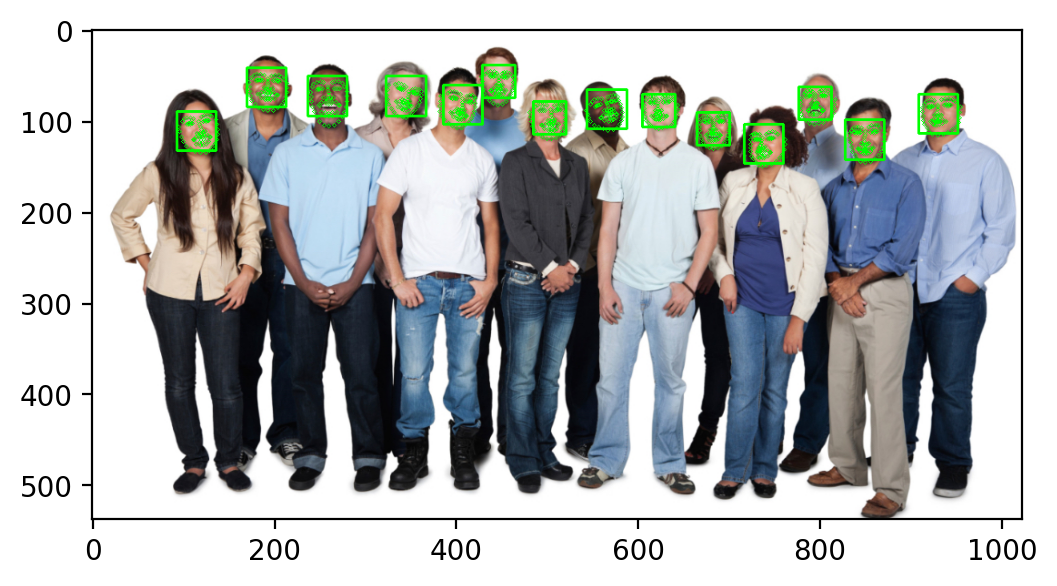

In [9]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [10]:
# 面部特征描述符

In [11]:
# 人脸检测模型
hog_face_detector = dlib.get_frontal_face_detector()
# 关键点 检测模型
shape_detector = dlib.shape_predictor('./weights/shape_predictor_68_face_landmarks.dat')
# resnet模型
face_descriptor_extractor = dlib.face_recognition_model_v1('./weights/dlib_face_recognition_resnet_model_v1.dat')

In [25]:
# 提取单张图片的特征描述符,label
def getFaceFeatLabel(fileName):
    # 获取人脸labelid
    label_id = int(fileName.split('/')[-1].split('.')[0].split('subject')[-1])
    # 读取图片
    
    cap = cv2.VideoCapture(fileName)
    ret,img = cap.read()
    
    # 转为RGB
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    #人脸检测
    detections = hog_face_detector(img,1)
    face_descriptor = None
    
    for face in detections:
        # 获取关键点
        points = shape_detector(img,face)
        # 获取特征描述符
        face_descriptor = face_descriptor_extractor.compute_face_descriptor(img,points)
        # 转为numpy 格式的数组
        face_descriptor = [f for f in face_descriptor]
        face_descriptor = np.asarray(face_descriptor,dtype=np.float64)
        face_descriptor = np.reshape(face_descriptor,(1,-1))
    
    return label_id,face_descriptor

In [26]:
# 测试一张图片
id1,fd1 = getFaceFeatLabel('./yalefaces/train/subject01.leftlight.gif')

In [27]:
fd1.shape

(1, 128)

In [30]:
# 对train文件夹进行处理
import glob

file_list =glob.glob('./yalefaces/train/*')
# 构造两个空列表
label_list = []
feature_list = None

name_list = {}
index= 0
for train_file in file_list:
    # 获取每一张图片的对应信息
    label,feat = getFaceFeatLabel(train_file)
    
    #过滤数据
    if feat is not None: 
        #文件名列表
        name_list[index] = train_file
        
        #label列表
        label_list.append(label)
        
        
        if feature_list is None:
            feature_list = feat
        else:
            # 特征列表
            feature_list = np.concatenate((feature_list,feat),axis=0)
        index +=1

In [32]:
len(label_list)

132

In [33]:
feature_list.shape

(132, 128)

In [35]:
len(name_list)

132

In [36]:
name_list

{0: './yalefaces/train\\subject01.glasses.gif',
 1: './yalefaces/train\\subject01.leftlight.gif',
 2: './yalefaces/train\\subject01.noglasses.gif',
 3: './yalefaces/train\\subject01.normal.gif',
 4: './yalefaces/train\\subject01.sad.gif',
 5: './yalefaces/train\\subject01.sleepy.gif',
 6: './yalefaces/train\\subject01.surprised.gif',
 7: './yalefaces/train\\subject01.wink.gif',
 8: './yalefaces/train\\subject02.glasses.gif',
 9: './yalefaces/train\\subject02.happy.gif',
 10: './yalefaces/train\\subject02.noglasses.gif',
 11: './yalefaces/train\\subject02.normal.gif',
 12: './yalefaces/train\\subject02.rightlight.gif',
 13: './yalefaces/train\\subject02.sad.gif',
 14: './yalefaces/train\\subject02.sleepy.gif',
 15: './yalefaces/train\\subject02.surprised.gif',
 16: './yalefaces/train\\subject02.wink.gif',
 17: './yalefaces/train\\subject03.centerlight.gif',
 18: './yalefaces/train\\subject03.happy.gif',
 19: './yalefaces/train\\subject03.noglasses.gif',
 20: './yalefaces/train\\subject0

In [40]:
feature_list[100]

array([-0.04002353,  0.1270756 ,  0.0712276 , -0.00709001, -0.06835698,
       -0.05430241, -0.01340284, -0.03349683,  0.21279033, -0.02416467,
        0.23374976, -0.02222661, -0.24263582,  0.01428987, -0.11278771,
        0.17095208, -0.07398933, -0.06234868, -0.1701569 , -0.12964757,
        0.00911354,  0.12395205,  0.00404465, -0.04684508, -0.1459292 ,
       -0.23717026, -0.11186991, -0.06274647,  0.16915584, -0.06881971,
        0.05980719,  0.09719942, -0.17893974, -0.07927143,  0.10608829,
        0.00437263, -0.04056147, -0.06083017,  0.25581253,  0.15630315,
       -0.13259435,  0.10182938, -0.00568939,  0.34255689,  0.12212187,
        0.003549  ,  0.06189087, -0.10344566,  0.04815118, -0.216341  ,
        0.04030668,  0.18290767,  0.06320614,  0.08376811,  0.15554932,
       -0.17170465,  0.01758712,  0.18572752, -0.24583155,  0.13962844,
        0.10026111,  0.00446303, -0.11024437, -0.07532805,  0.07948148,
        0.05880733, -0.10819434, -0.1403235 ,  0.26048198, -0.12

In [41]:
# 计算距离
np.linalg.norm((feature_list[100]-feature_list[100]))

0.0

In [42]:
# 计算距离
np.linalg.norm((feature_list[100]-feature_list[101]))

0.2683925464620862

In [43]:
# 计算距离
np.linalg.norm((feature_list[100]-feature_list[112]))

0.8267784171824537

In [45]:
# 计算距离
np.linalg.norm((feature_list[100]-feature_list[96]))

0.384012342713569

In [47]:
# 计算一个特征描述符与所有特征的距离
np.linalg.norm((feature_list[0]-feature_list),axis=1)

array([0.        , 0.48992029, 0.37211911, 0.35581028, 0.51543908,
       0.48151447, 0.54761613, 0.49566379, 0.6950431 , 0.77329649,
       0.73359842, 0.73359842, 0.73421626, 0.73696717, 0.73482733,
       0.74683863, 0.76282718, 0.85345605, 0.76441795, 0.80798221,
       0.80798221, 0.77109683, 0.78844059, 0.80426717, 0.76877739,
       0.78156313, 0.94512002, 0.89450371, 0.91552612, 0.92289976,
       0.90163334, 0.92874091, 0.90163334, 0.90006939, 0.8960838 ,
       0.7656308 , 0.73200037, 0.7655796 , 0.74759713, 0.73759675,
       0.75155068, 0.77416643, 0.75906315, 0.83163383, 0.83925553,
       0.86775178, 0.86775178, 0.89771323, 0.86838225, 0.88262811,
       0.82586691, 0.89110904, 0.88370862, 0.76782481, 0.90608703,
       0.90608703, 0.89297016, 0.90314584, 0.88692007, 0.89899775,
       0.8934966 , 0.88344023, 0.88311846, 0.85766729, 0.84975744,
       0.93234985, 0.85751841, 0.87528151, 0.83665292, 0.87857221,
       0.83686733, 0.7253908 , 0.82191077, 0.78971114, 0.81990

In [49]:
# 计算一个特征描述符与所有特征的距离(排除自己)
np.linalg.norm((feature_list[0]-feature_list[1:]),axis=1)

array([0.48992029, 0.37211911, 0.35581028, 0.51543908, 0.48151447,
       0.54761613, 0.49566379, 0.6950431 , 0.77329649, 0.73359842,
       0.73359842, 0.73421626, 0.73696717, 0.73482733, 0.74683863,
       0.76282718, 0.85345605, 0.76441795, 0.80798221, 0.80798221,
       0.77109683, 0.78844059, 0.80426717, 0.76877739, 0.78156313,
       0.94512002, 0.89450371, 0.91552612, 0.92289976, 0.90163334,
       0.92874091, 0.90163334, 0.90006939, 0.8960838 , 0.7656308 ,
       0.73200037, 0.7655796 , 0.74759713, 0.73759675, 0.75155068,
       0.77416643, 0.75906315, 0.83163383, 0.83925553, 0.86775178,
       0.86775178, 0.89771323, 0.86838225, 0.88262811, 0.82586691,
       0.89110904, 0.88370862, 0.76782481, 0.90608703, 0.90608703,
       0.89297016, 0.90314584, 0.88692007, 0.89899775, 0.8934966 ,
       0.88344023, 0.88311846, 0.85766729, 0.84975744, 0.93234985,
       0.85751841, 0.87528151, 0.83665292, 0.87857221, 0.83686733,
       0.7253908 , 0.82191077, 0.78971114, 0.81990323, 0.81990

In [67]:
# 寻找最小值索引
np.argmin(np.linalg.norm((feature_list[0]-feature_list[1:]),axis=1))

2

In [68]:
np.linalg.norm((feature_list[0]-feature_list[1:]),axis=1)[2]

0.35581028298402767

In [70]:
name_list[1+2]

'./yalefaces/train\\subject01.normal.gif'

In [71]:
np.linalg.norm((feature_list[0]-feature_list[3]))

0.35581028298402767

C:\Users\Administrator\AppData\Local\Temp\ipykernel_20428\3447677856.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


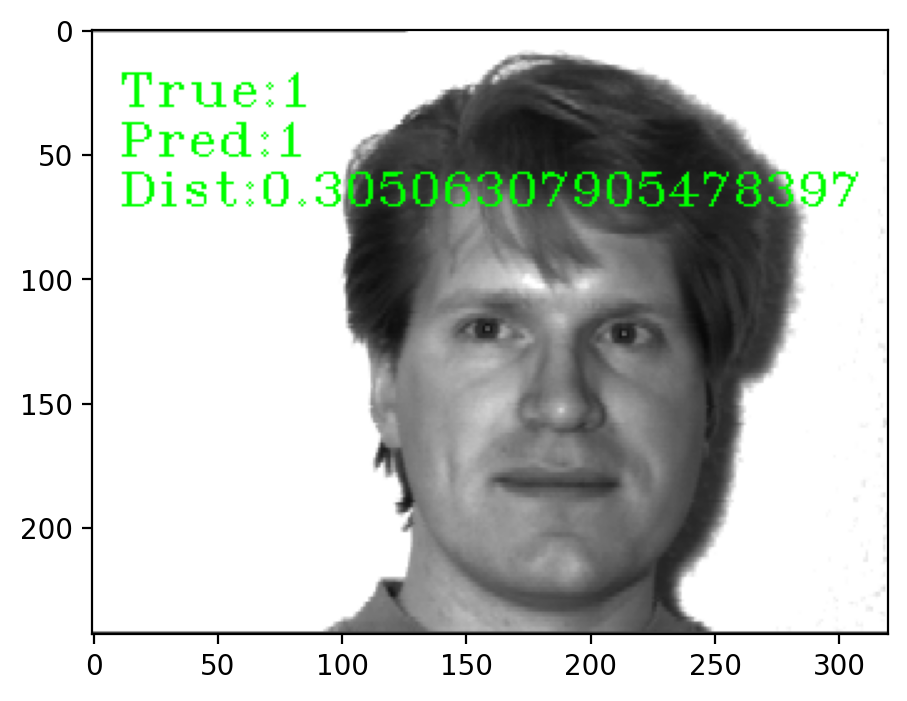

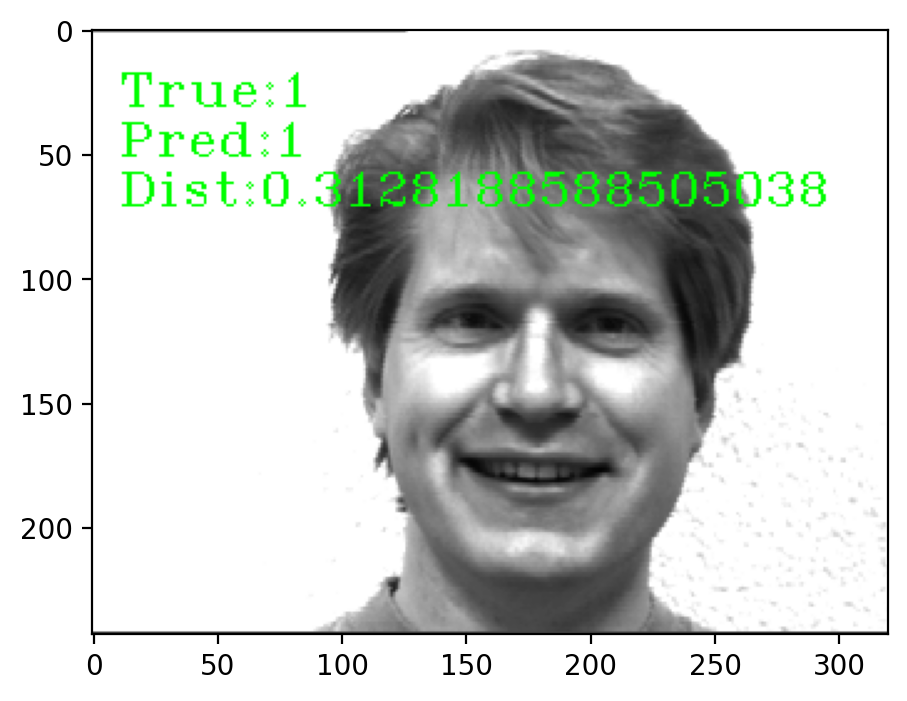

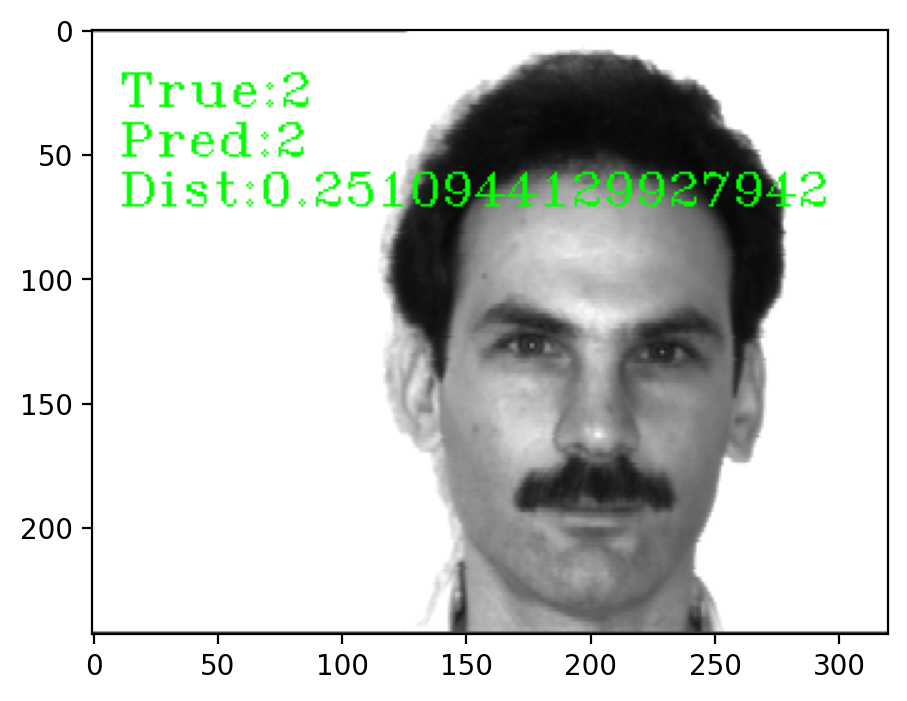

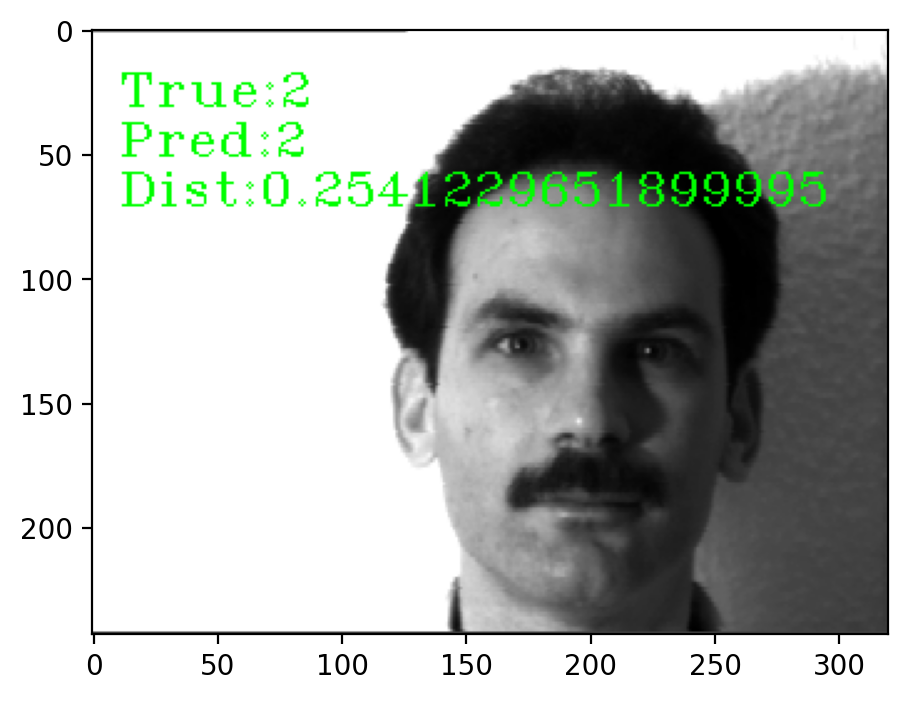

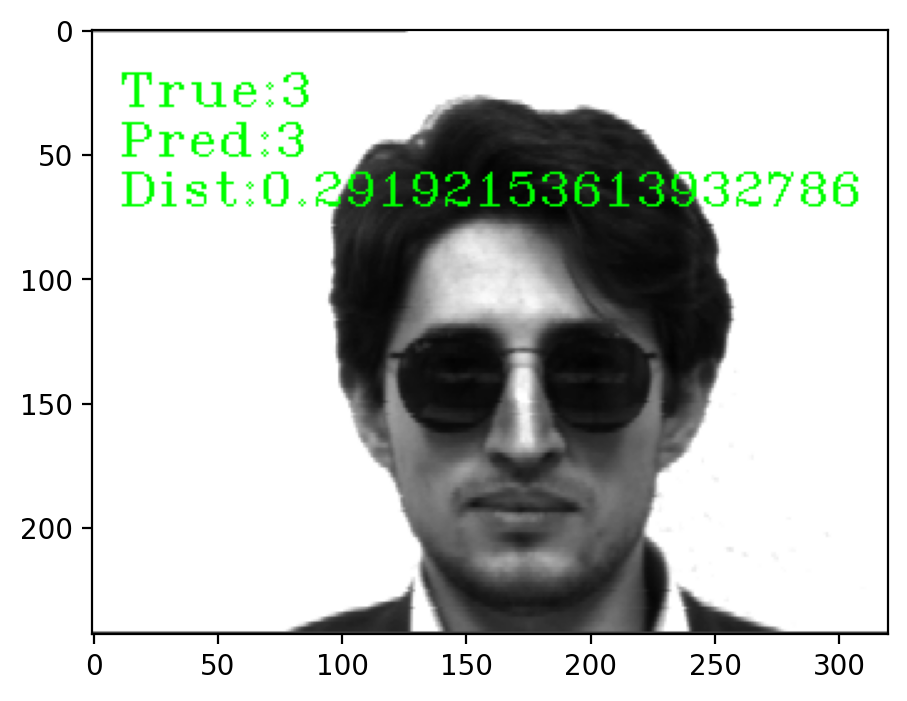

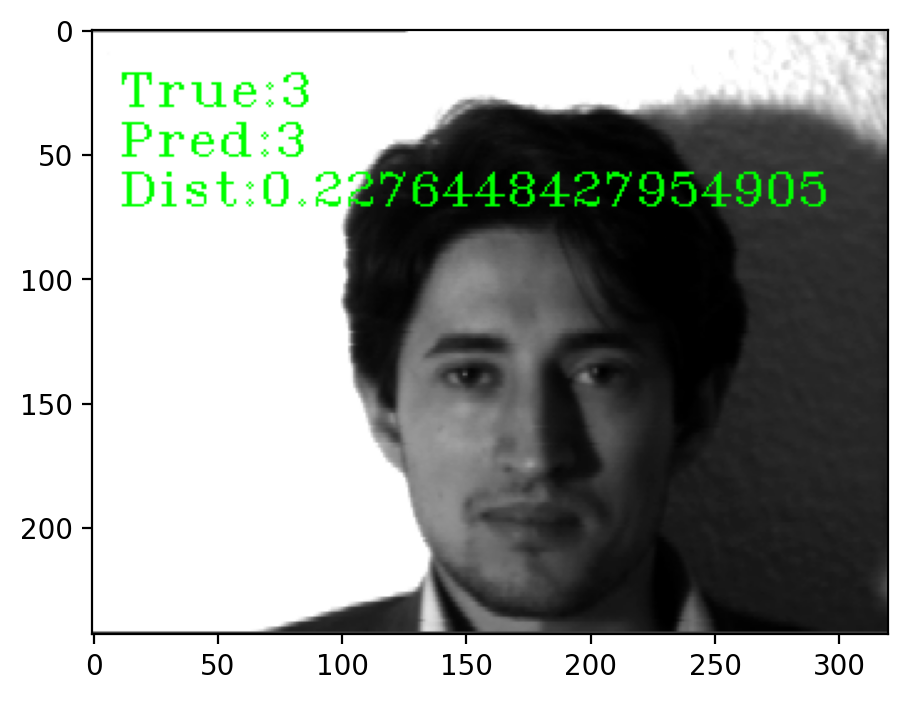

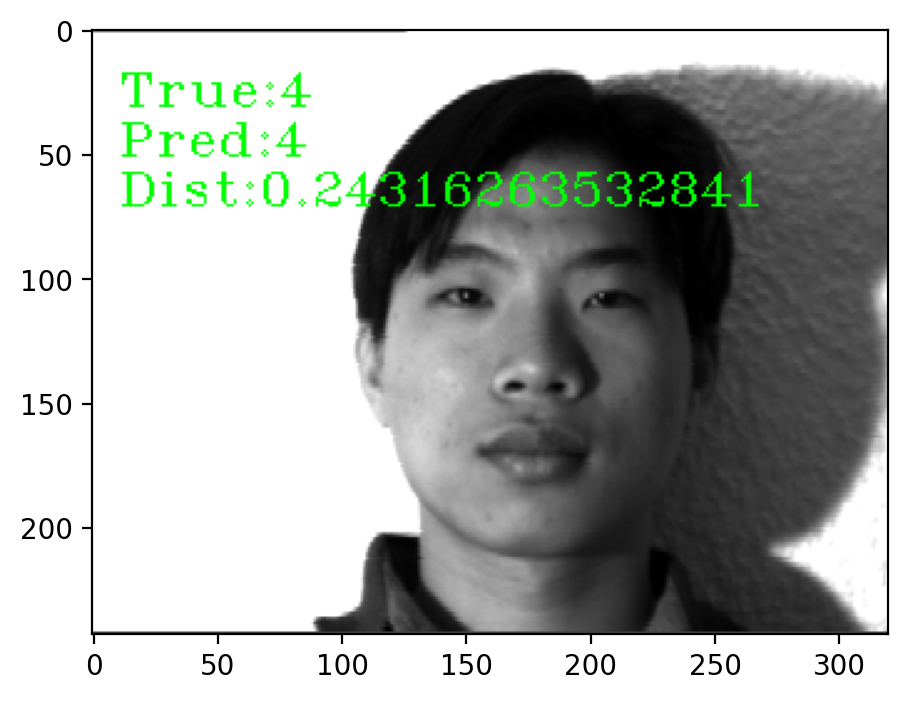

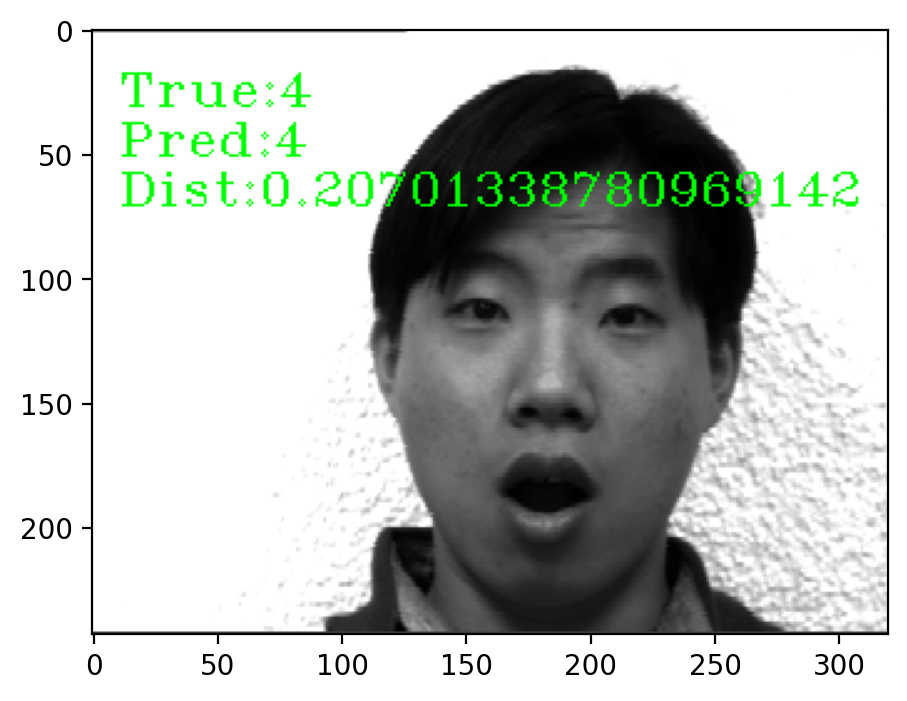

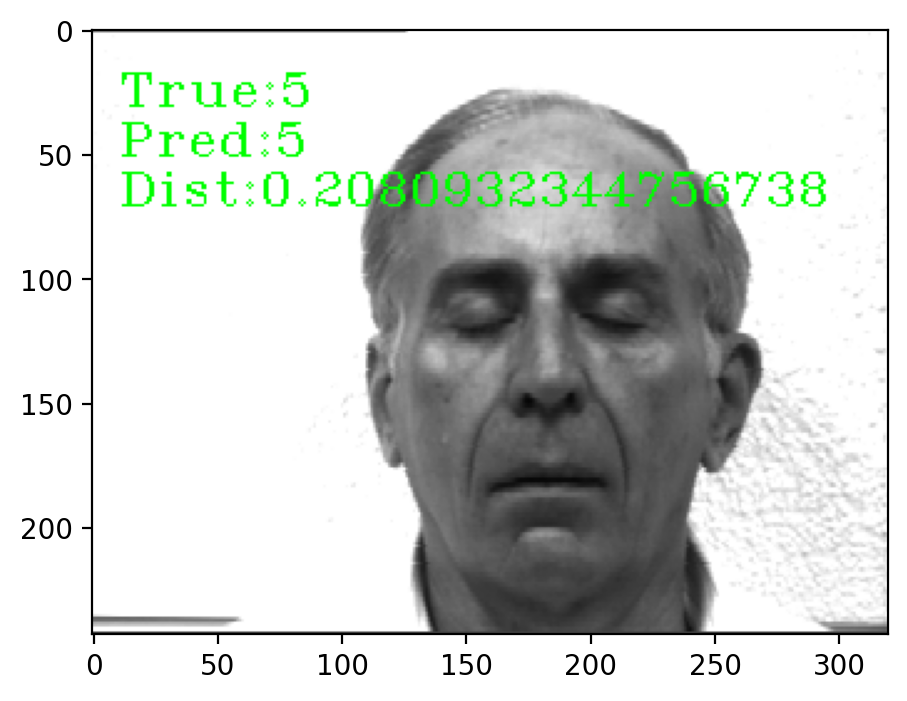

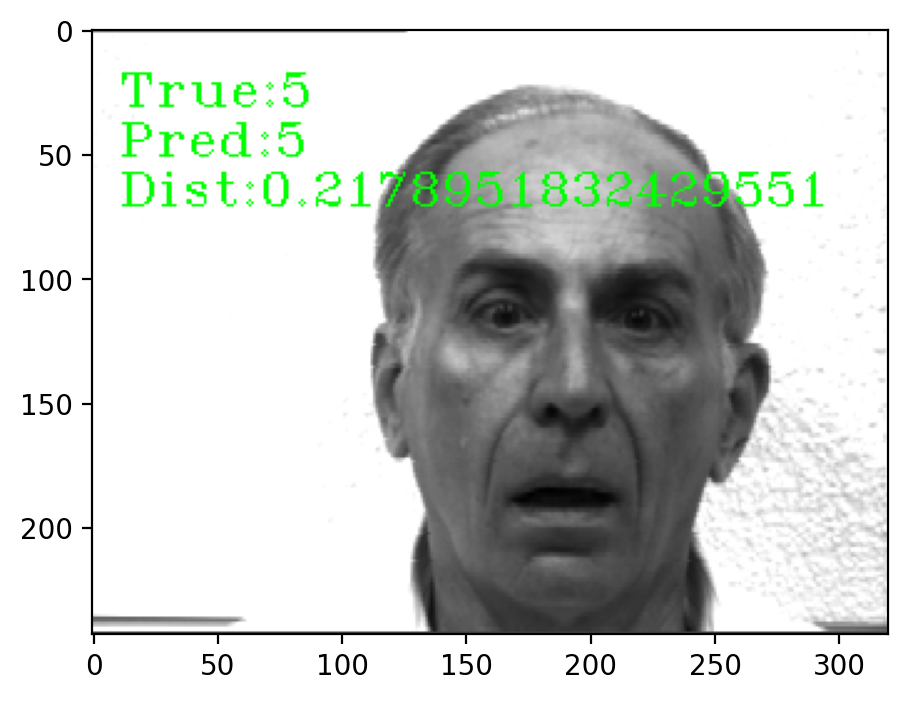

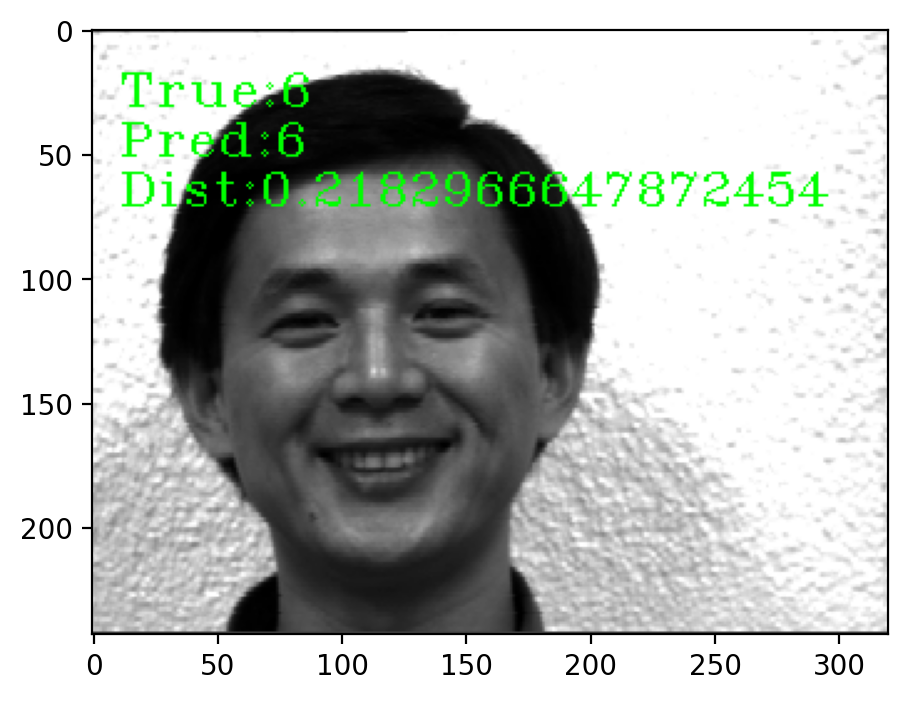

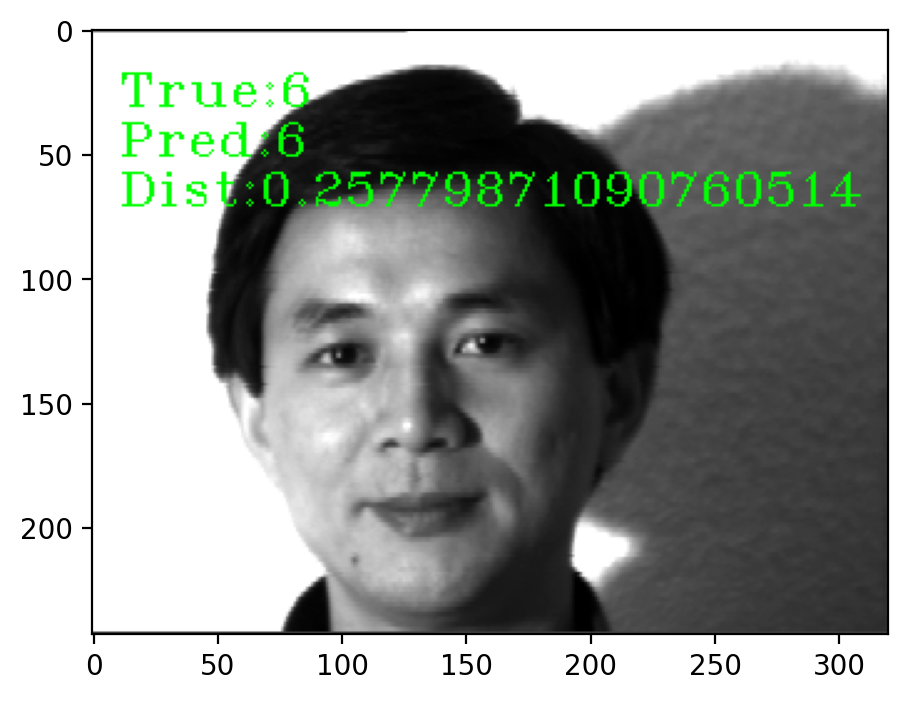

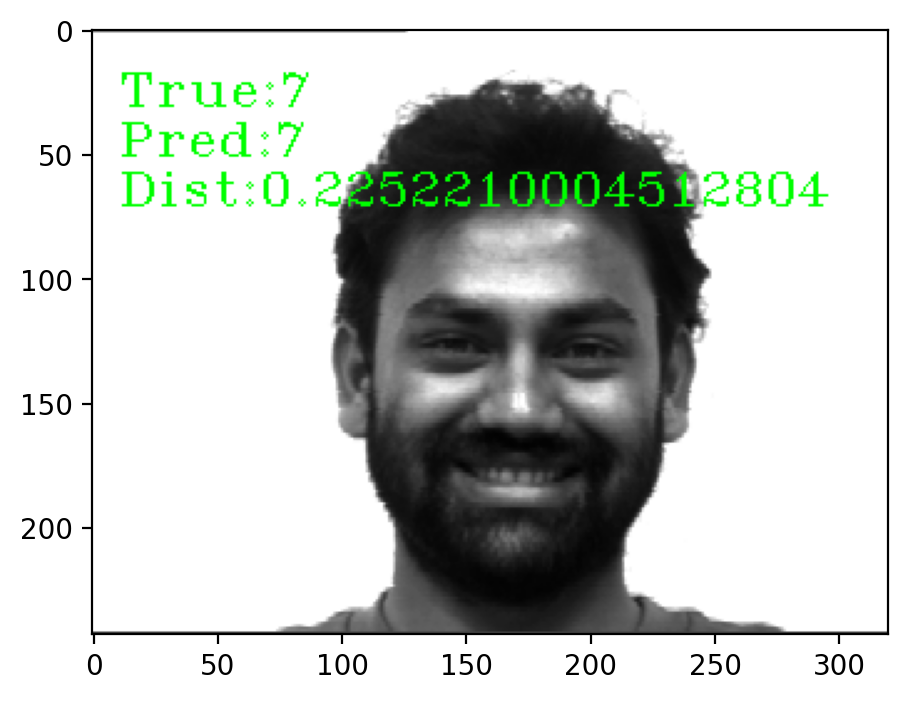

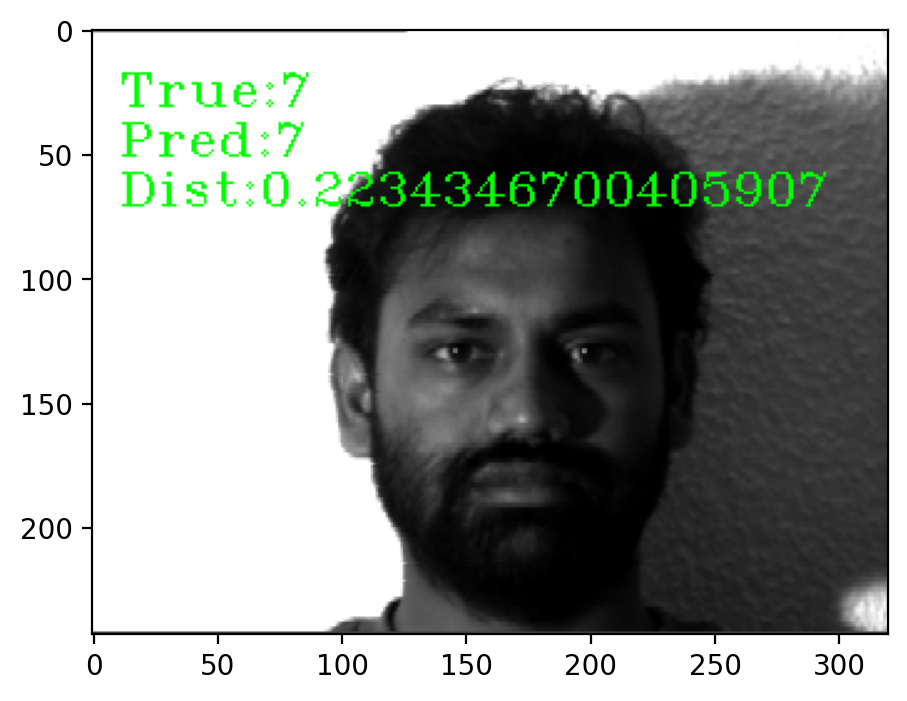

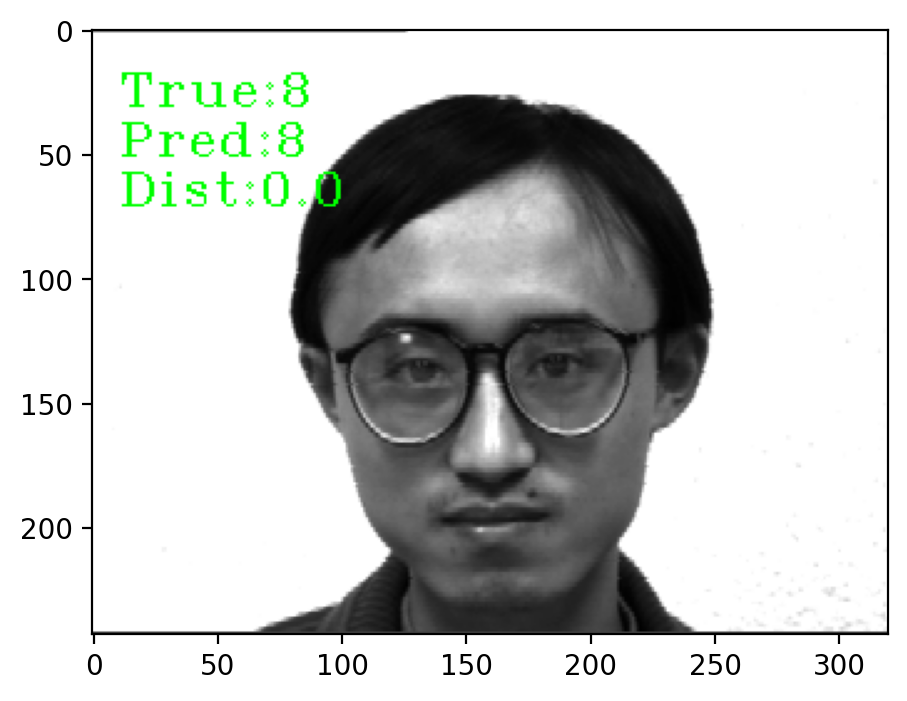

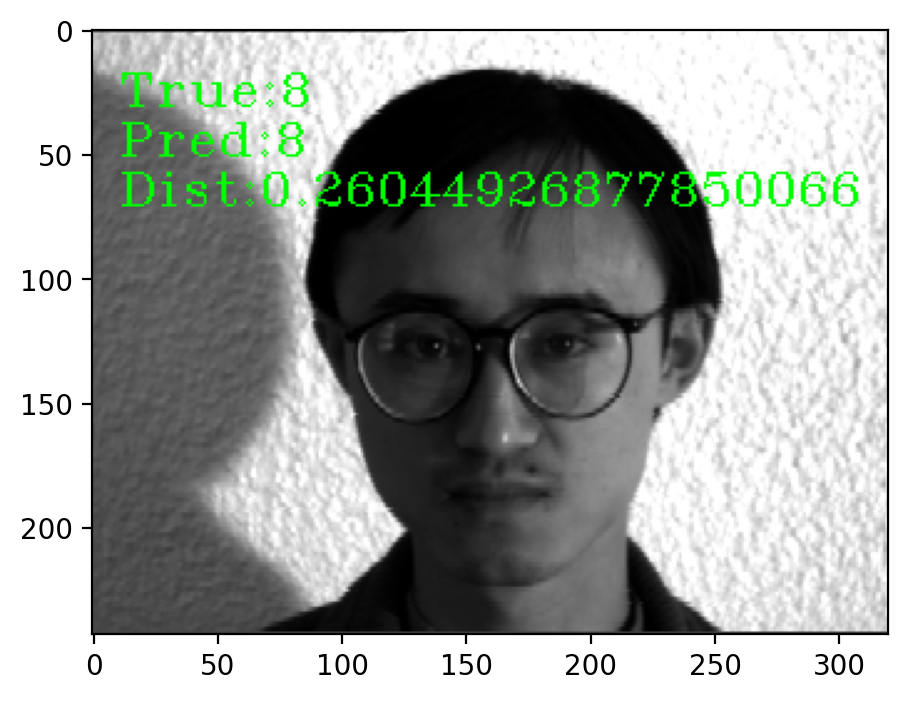

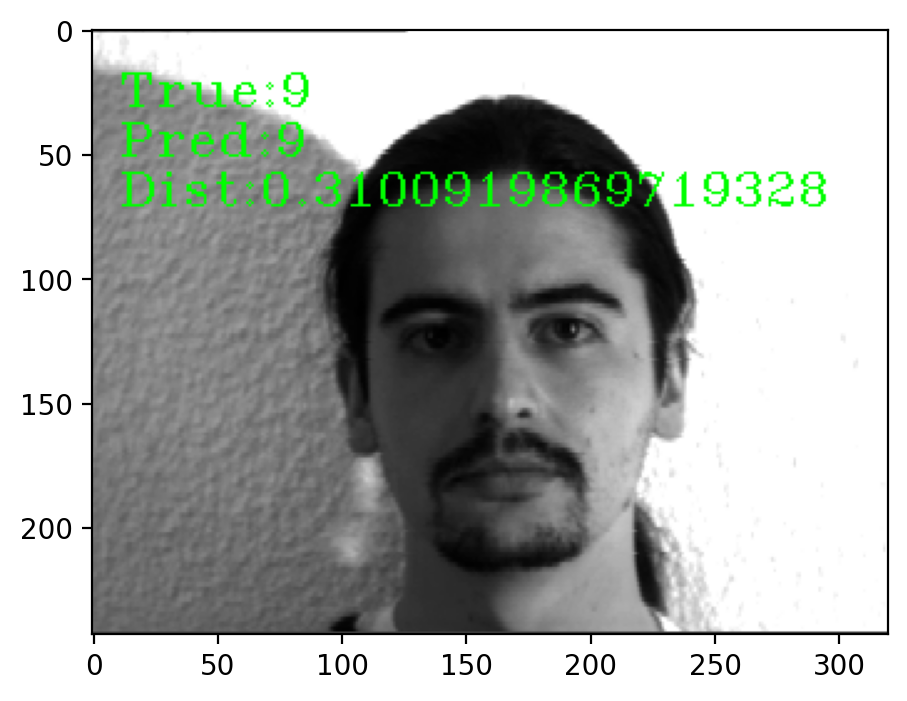

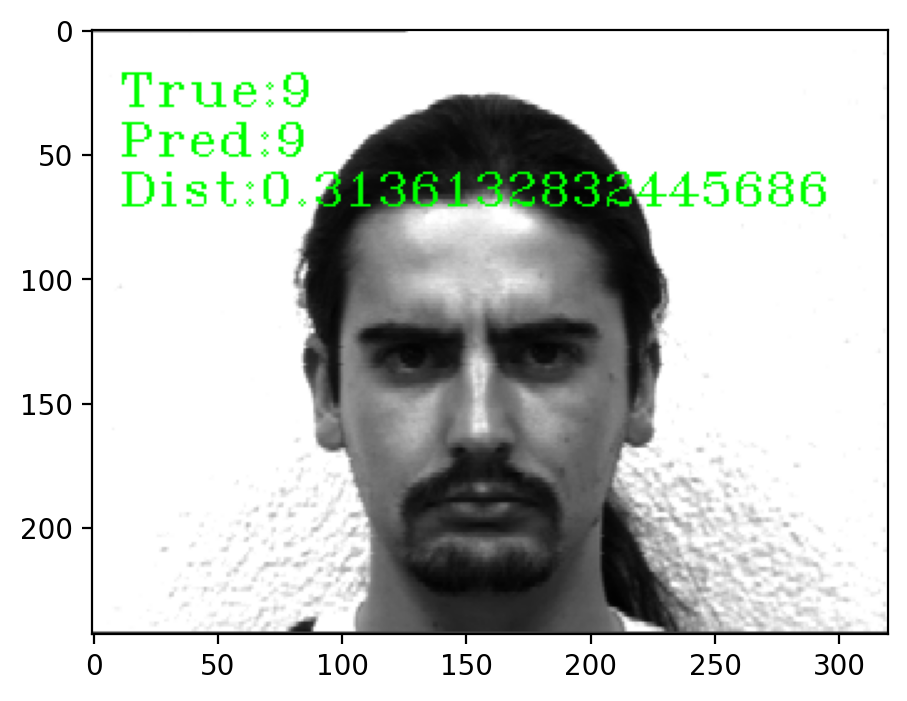

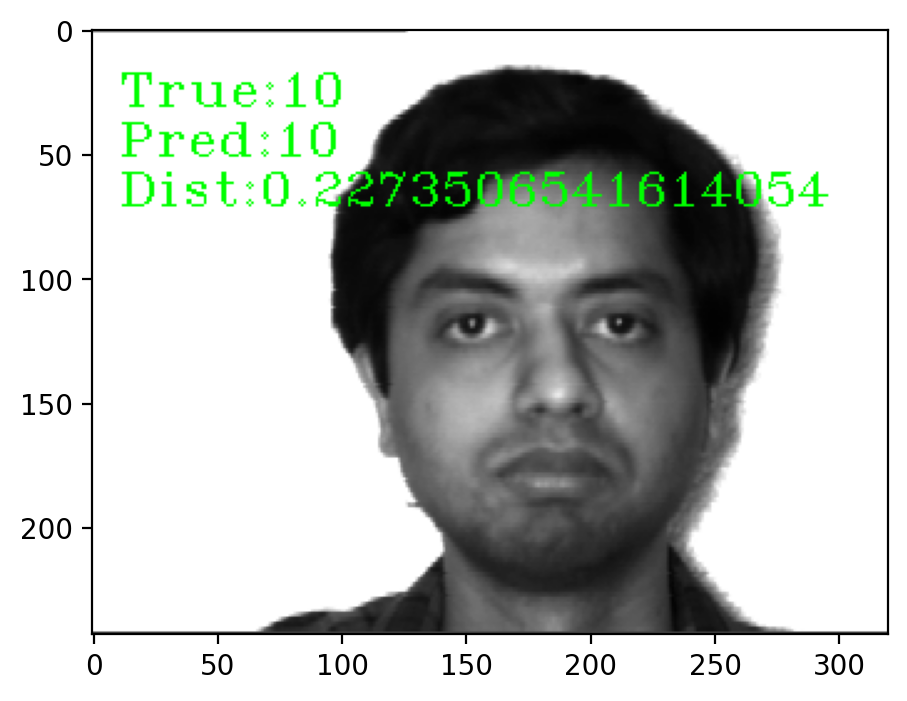

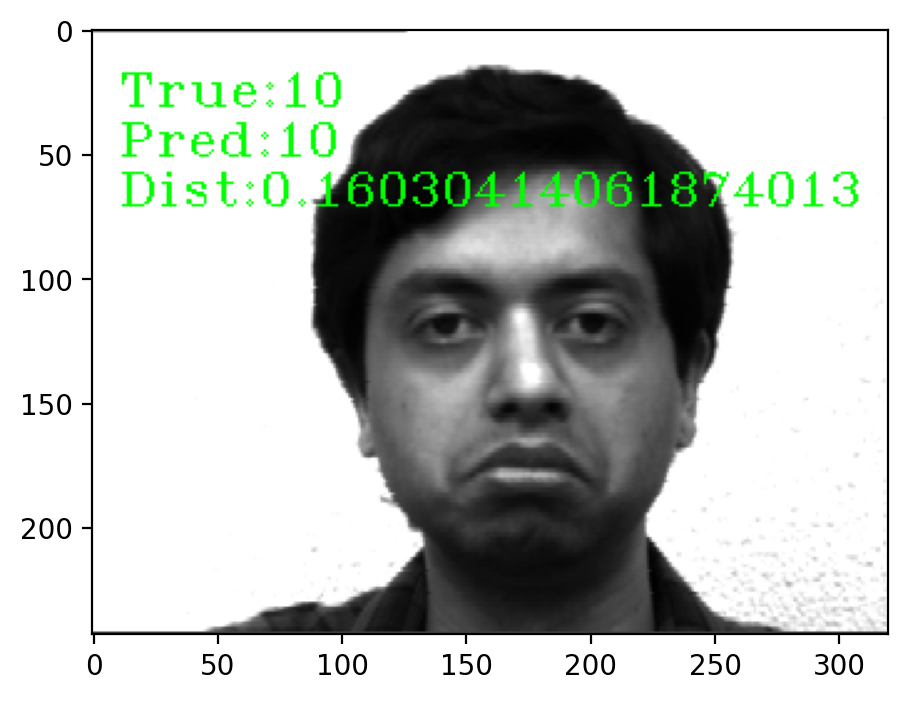

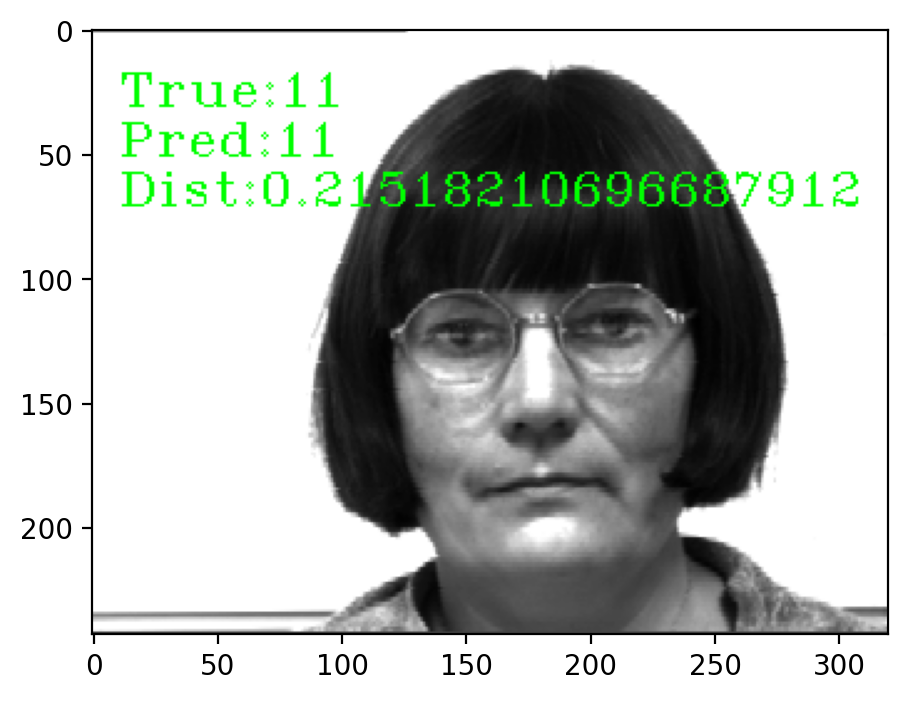

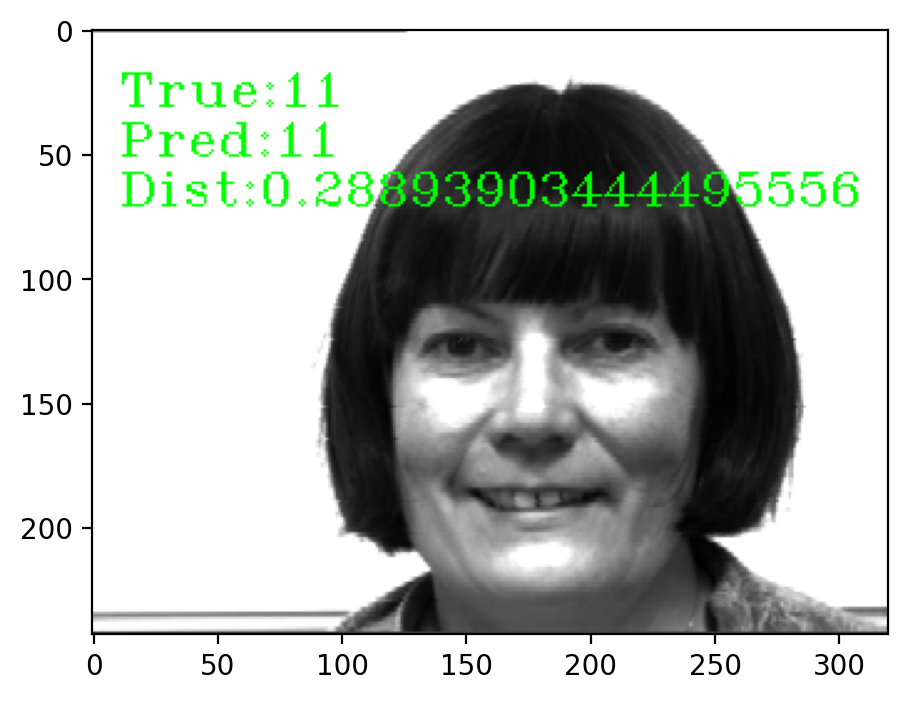

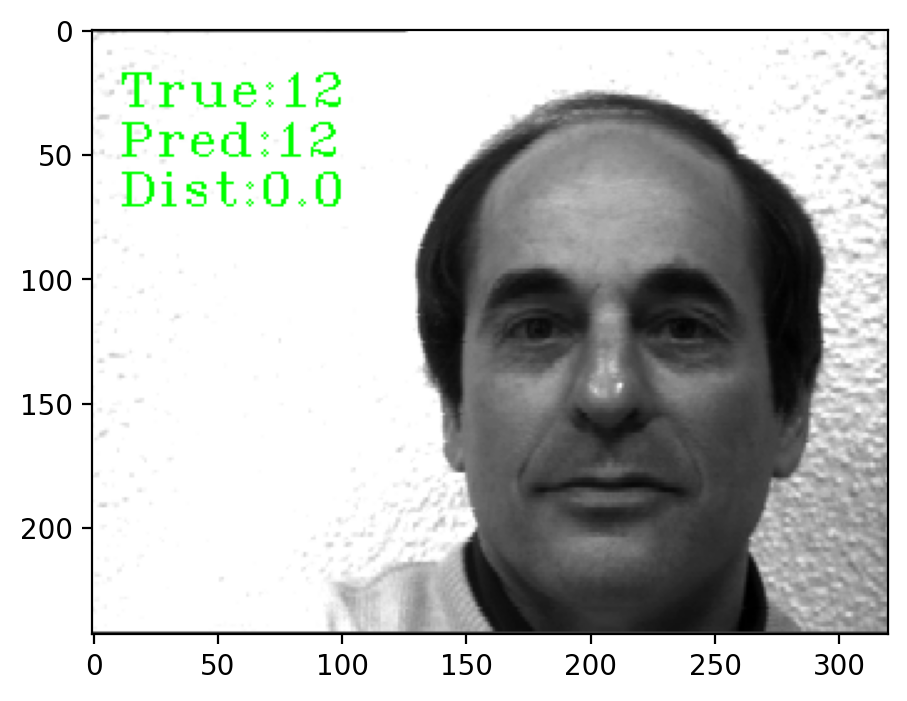

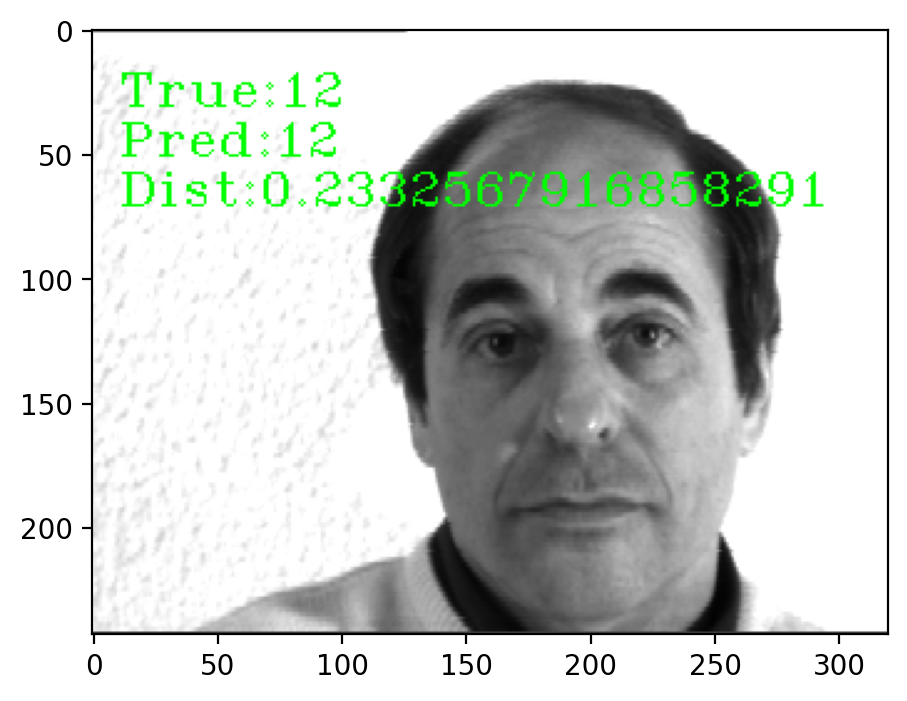

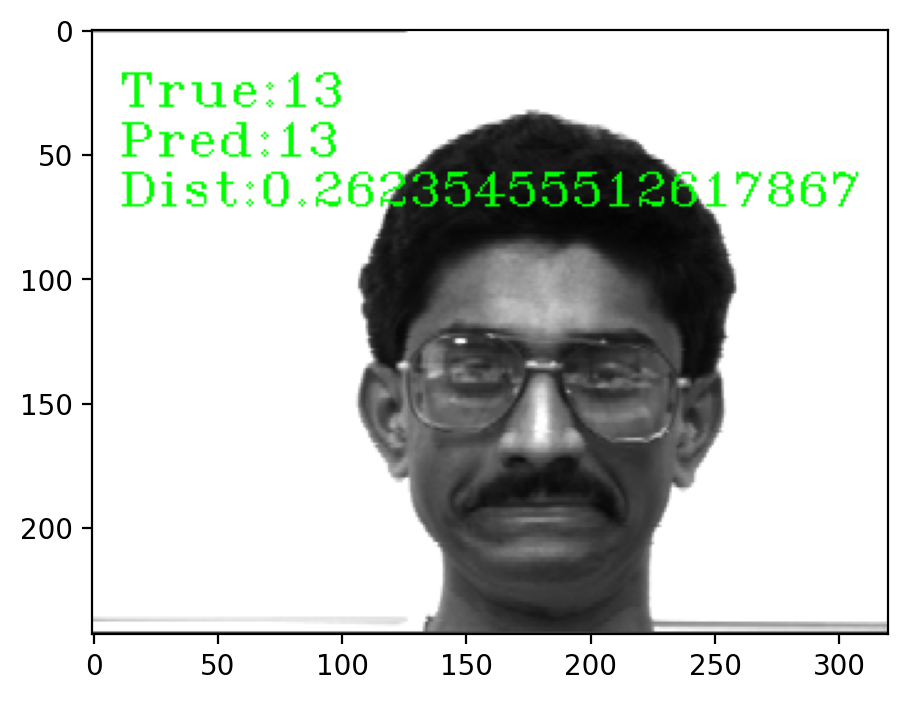

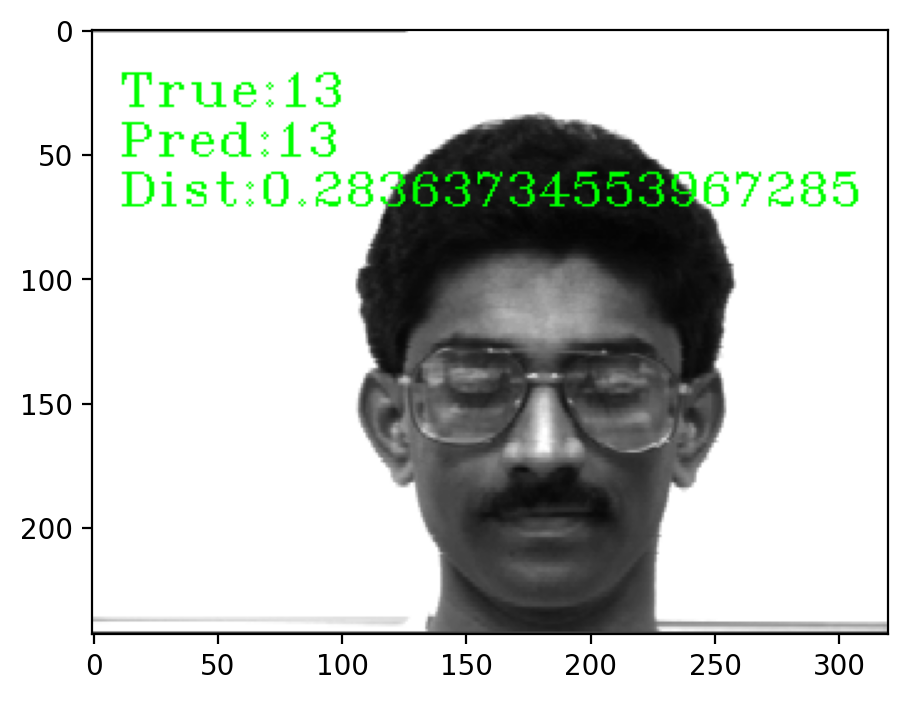

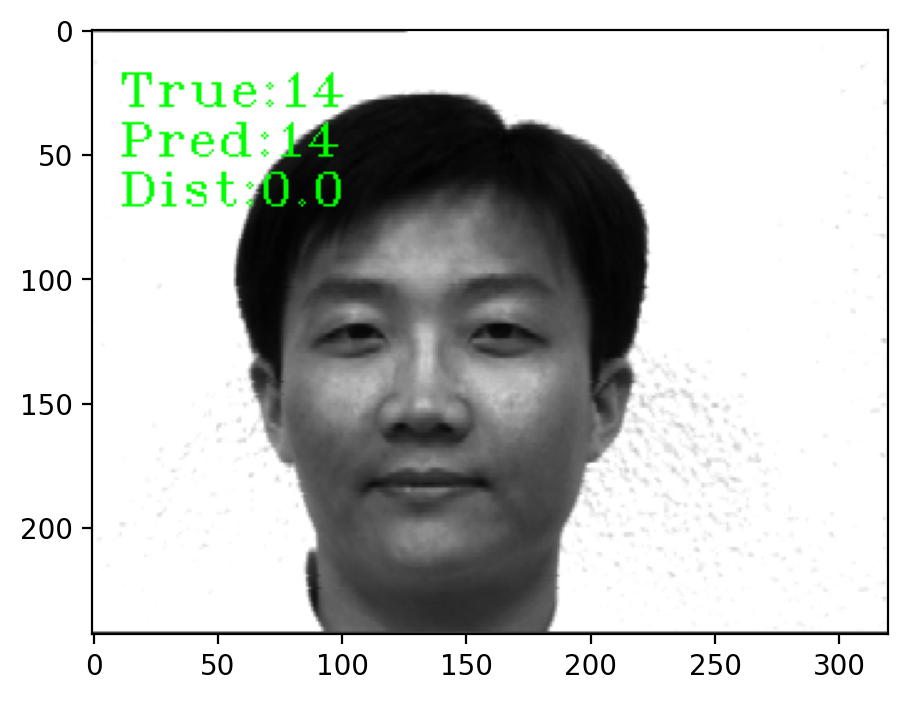

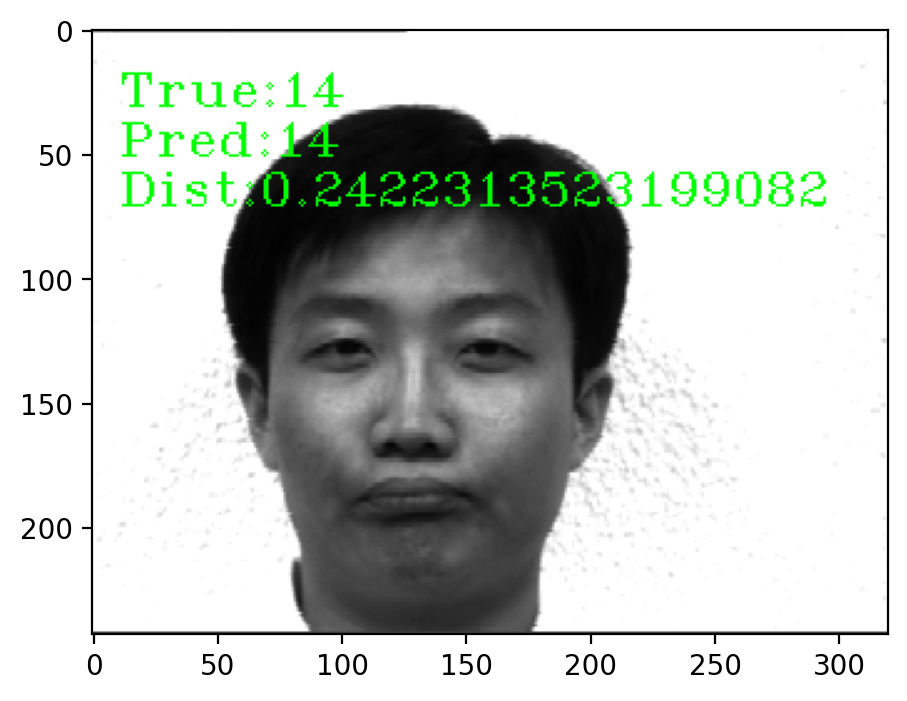

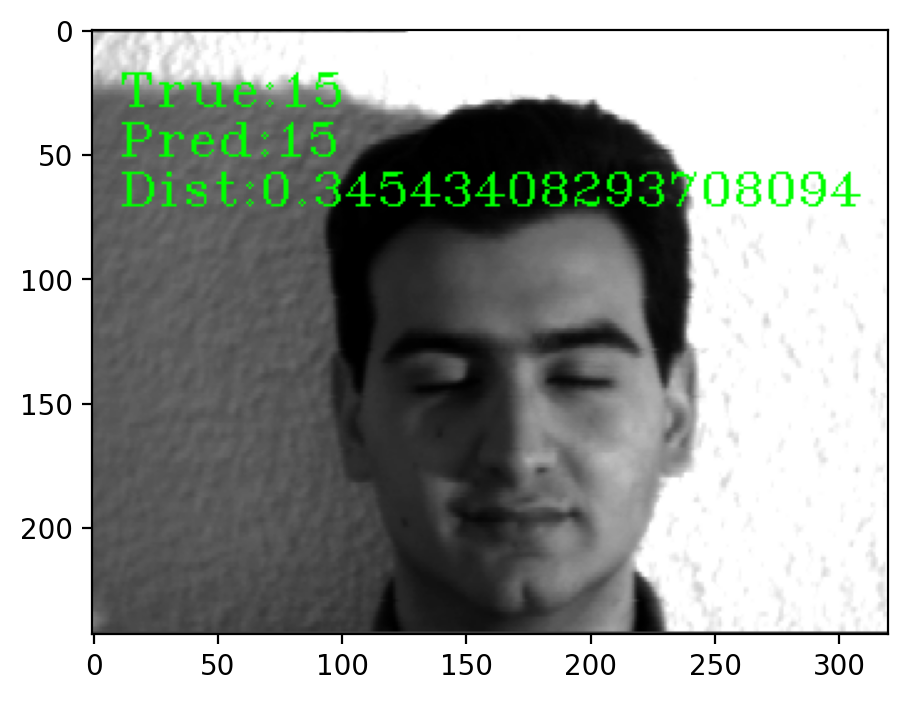

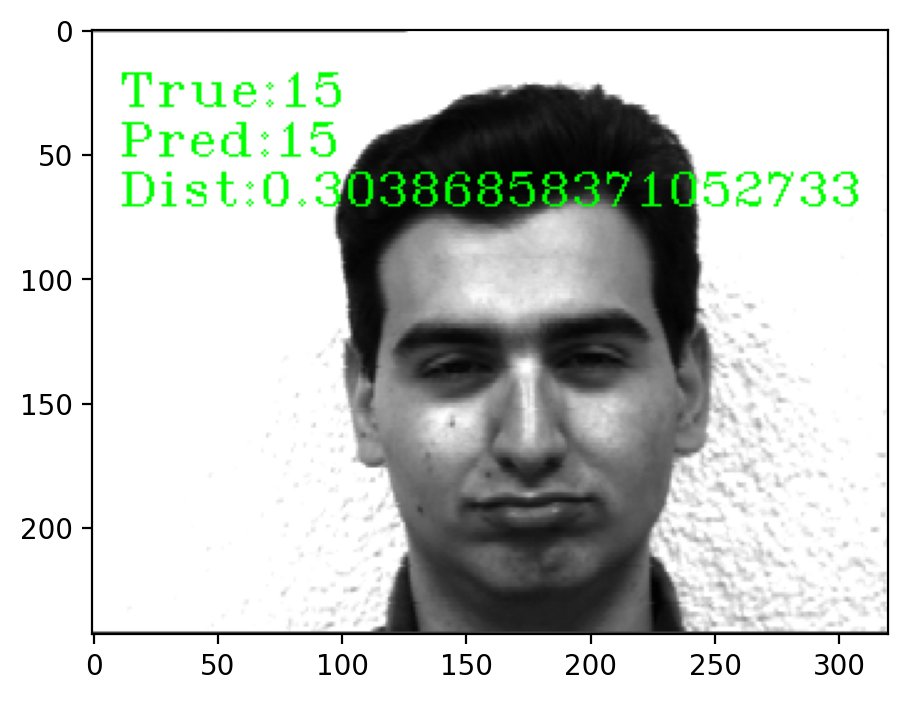

In [80]:
# 评估测试数据集


file_list =glob.glob('./yalefaces/test/*')
# 构造两个空列表
predict_list = []
label_list= []
# 距离阈值
threshold = 0.5

for test_file in file_list:
    # 获取每一张图片的对应信息
    label,feat = getFaceFeatLabel(test_file)
    
    # 读取图片
    cap = cv2.VideoCapture(test_file)
    ret,img = cap.read()
    
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    
    #过滤数据
    if feat is not None: 
        # 计算距离
        distances = np.linalg.norm((feat-feature_list),axis=1)
        min_index = np.argmin(distances)
        min_distance = distances[min_index]
        
        if min_distance < threshold:
            # 同一人
            
            predict_id = int(name_list[min_index].split('/')[-1].split('.')[0].split('subject')[-1])
        else:
            predict_id =  -1
            
        
        predict_list.append(predict_id)
        label_list.append(label)
        
        cv2.putText(img,'True:'+str(label),(10,30),cv2.FONT_HERSHEY_COMPLEX_SMALL,1,(0,255,0))
        cv2.putText(img,'Pred:'+str(predict_id),(10,50),cv2.FONT_HERSHEY_COMPLEX_SMALL,1,(0,255,0))
        cv2.putText(img,'Dist:'+str(min_distance),(10,70),cv2.FONT_HERSHEY_COMPLEX_SMALL,1,(0,255,0))
        
        # 显示
        plt.figure()
        plt.imshow(img)
        
        

In [76]:
# 公式评估

In [77]:
from sklearn.metrics import accuracy_score

In [78]:
accuracy_score(label_list,predict_list)

1.0